#Installing dependencies

In [1]:
!pip install scikit-plot

#Importing libraries

In [2]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


#Importing Datafile

In [3]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("Data v1.0.xlsx")

# Exploratory Data Analysis (EDA)

In [4]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [5]:
df2.rename(columns={'Annual Income': 'Annual_Income',
                   'Social Media usage': 'Social_Media_usage',
                   'Experience of purchasing due to social media influence': 'Experience',
                   'Reviews and rating impact on purchasing decision': 'Reviews_and_rating',
                   'Average time spent on the Internet (weekly)': 'ATI',
                   'Attention to advertisement on social media': 'ADSM',
                   'Purchase Behaviour 1 (PB1)': 'PB1',
                   'Purchase Behaviour 2 (PB2)': 'PB2',
                   'Purchase Behaviour 3 (PB3)': 'PB3',
                   'Purchase Behaviour 4 (PB4)': 'PB4',
                   'Attitude 1 (ATTD1)': 'ATTD1',
                   'Attitude 2 (ATTD2)': 'ATTD2',
                   'Attitude 3 (ATTD3)': 'ATTD3',
                   'Attitude 4 (ATTD4)': 'ATTD4',
                   'Social Norms 1 (SN1)': 'SN1',
                   'Social Norms 2 (SN2)': 'SN2',
                   'Social Norms 3 (SN3)': 'SN3',
                   'Social Norms 4 (SN4)': 'SN4',
                   'Perceived Behavioural Control 1 (PBC1)': 'PBC1',
                   'Perceived Behavioural Control 2 (PBC2)': 'PBC2',
                   'Perceived Behavioural Control 3 (PBC3)': 'PBC3',
                   'Perceived Behavioural Control 4 (PBC4)': 'PBC4',
                   },
          inplace=True, errors='raise')

# DATA PREPROCESSING

In [6]:
#replacing the categorical value of PB, ATTD, SN and PBC to numerical value
df2 = df2.replace('Strongly agree',5)
df2 = df2.replace('Agree',4)
df2 = df2.replace('Neutral',3)
df2 = df2.replace('Disagree',2)
df2 = df2.replace('Strongly disagree',1)

In [7]:
# Merging PB1, PB2, PB3, PB4 to PB
df2['PB'] = df2['PB1'] + df2['PB2']+ df2['PB3']+ df2['PB4']

In [8]:
#Diving the PB target attribute to two class High and Low, Appending a new target attribute PB-inf.
rating = []
for row in df2['PB']:
    if row<=10:
        rating.append('LOW')
    else:
        rating.append('HIGH')
df2['PB-inf'] = rating

In [9]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df3= df2.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df2.shape)


(219, 23)


In [10]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM']
df2.drop(columns = colsToDrop, inplace = True)
y = df2['PB-inf']
X = df2.drop(columns = 'PB-inf')

In [11]:
df2.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB-inf
0,3,3,3,3,3,3,3,3,3,3,3,3,HIGH
1,4,3,4,3,1,2,4,3,3,4,2,2,HIGH
2,3,1,1,2,1,1,1,1,1,1,1,1,LOW
3,4,4,4,3,3,3,4,4,3,4,3,4,HIGH
4,3,4,4,4,3,2,3,3,3,4,4,4,HIGH


# Hold Out Validation

In [12]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

# LIME

##Installing Lime

In [13]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=426146e1bd0cc95c8a66d1ce86775cd5d6b24a795fb0d8fb6cfdbbd267d99300
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [14]:
#importing libraries
import numpy as np
import lime
# import lime.lime_tabular
from lime import lime_tabular
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_train.columns

Index(['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4', 'SN1', 'SN2', 'SN3', 'SN4', 'PBC1',
       'PBC2', 'PBC3', 'PBC4'],
      dtype='object')

In [16]:
# Training Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=20)
model.fit(X_train, y_train)

# Defining the lime explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['HIGH', 'LOW'],
    mode='classification'
)


In [17]:
X_test.iloc[5], y_test.iloc[5]

(ATTD1    5
 ATTD2    4
 ATTD3    4
 ATTD4    4
 SN1      5
 SN2      4
 SN3      4
 SN4      3
 PBC1     5
 PBC2     3
 PBC3     5
 PBC4     5
 Name: 89, dtype: int64,
 'HIGH')

In [18]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[5],
    predict_fn=model.predict_proba, num_features = 12
)

exp.show_in_notebook(show_table=True)

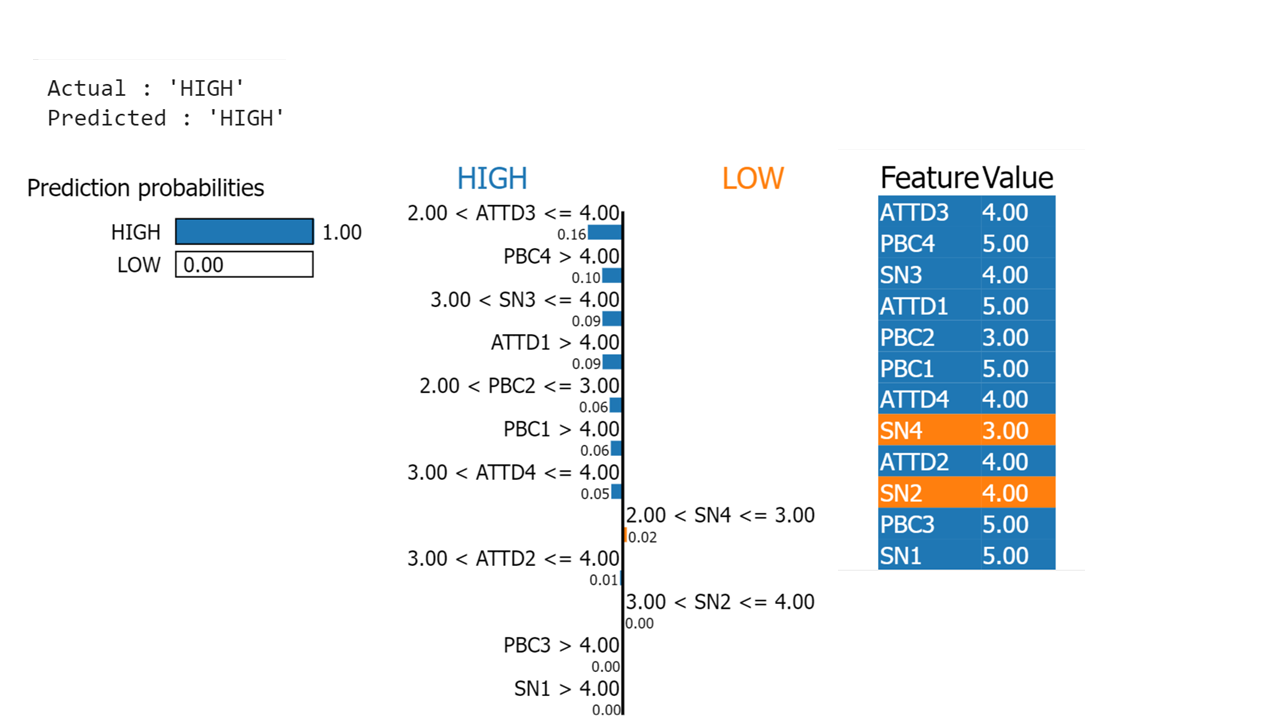

In [19]:
print("Actual : 'HIGH'")
print("Predicted : 'HIGH'")

Actual : 'HIGH'
Predicted : 'HIGH'


In [20]:
X_test.iloc[2], y_test.iloc[2]

(ATTD1    2
 ATTD2    2
 ATTD3    1
 ATTD4    2
 SN1      1
 SN2      1
 SN3      1
 SN4      3
 PBC1     1
 PBC2     1
 PBC3     1
 PBC4     2
 Name: 194, dtype: int64,
 'LOW')

In [21]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[2],
    predict_fn=model.predict_proba, num_features = 12
)

exp.show_in_notebook(show_table=True)

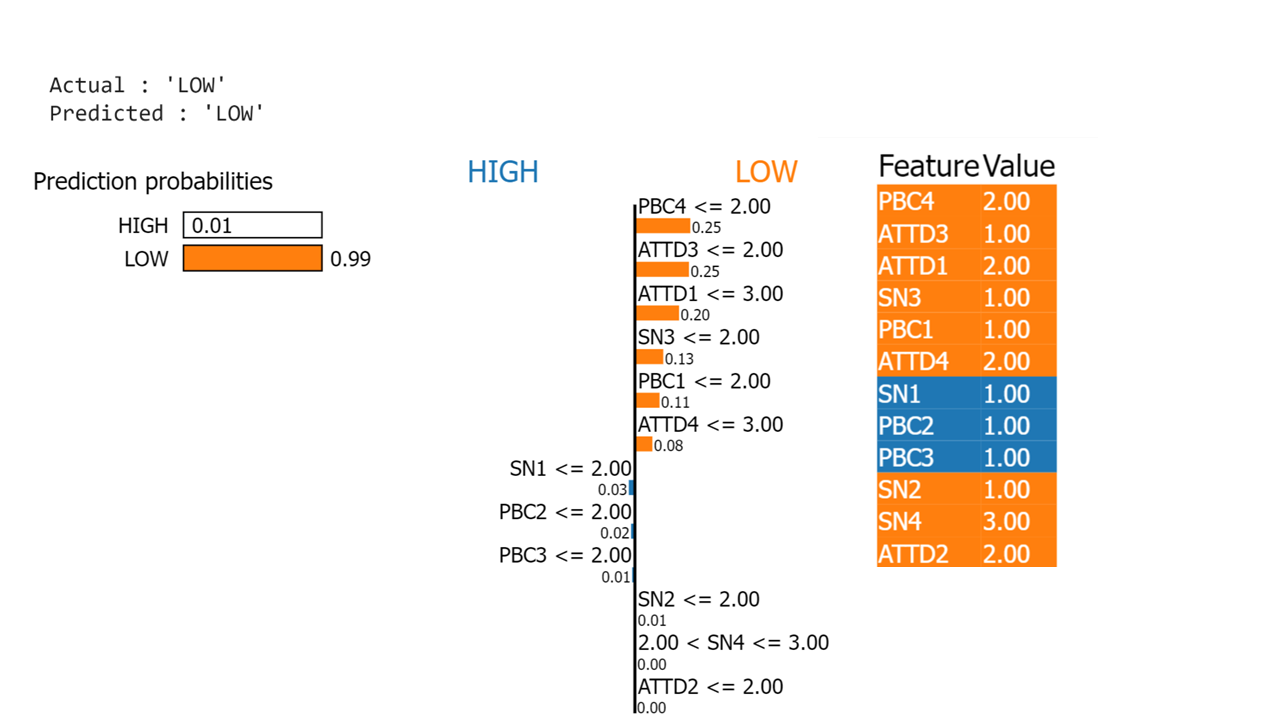

In [22]:
print("Actual : 'LOW'")
print("Predicted : 'LOW'")

Actual : 'LOW'
Predicted : 'LOW'
